<a href="https://colab.research.google.com/github/malice-hub/DataScience/blob/master/Analisando_dados_do_Airbnb_T%C3%B3quio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados do Airbnb - Tóquio

No final de 2019 a [Airbnb](https://www.airbnb.com.br/) - considerada a **maior empresa hoteleira da atualidade**, sem ser proprietária de **nenhum hotel** - assinou um contrato de US$ 500 milhões para patrocinar os Jogos Olímpicos até 2028, a começar com Tóquio.

Em agosto de 2019 o governo do Japão, após um desentendimento com a Airbnb, começou a incentivar a população a receber turistas em casa, para ajudar a desafogar a estrutura hoteleira no período das Olimpíadas. Poucos meses depois, esse contrato Airbnb-COI foi assinado, praticamente como uma resposta a um problema de Tóquio para este ano.

Esse fato despertou minha curiosidade em analisar como estão os dados mais recentes de hospedagem via Airbnb na capital do Japão, para uma possível comparação no período da Olimpíada e Paralimpíada, e depois.

Para isso, serão utilizados dados que a própria Airbnb disponibliza por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), como incentivo ao desenvolvimento de projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Este trabalho propõe**

Analisar a oferta de locais de hospedagem nas proximidades das instalações em que serão realizados os Jogos Olímpicos em 2020

*Obs.:* os dados em uso neste trabalho são referentes a novembro de 2019.

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Dentre os arquivos fornecidos, vamos trabalhar apenas com este:

* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations).*


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2019-11-28/visualisations/listings.csv")

## Análise dos Dados

Inicialmente, avaliamos os dados obtidos para entender sua estrutura e observar o cenário geral das informações.


#Dicionário das variáveis

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude do imóvel
* `longitude` - coordenada da longitude do imóvel
* `room_type` - tipo de locação oferecida
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar o imóvel
* `number_of_reviews` - número de reviews que o imóvel possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade do imóvel no período de 365 dias

Verificamos primeiro o que temos no nosso *dataset*, analisando as 5 primeiras entradas:

In [0]:
# mostrar as 5 primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4160,28,18,2018-07-28,0.19,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10948,3,160,2019-11-06,1.60,1,116
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4270,30,111,2019-10-31,1.22,2,206
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,7007,28,102,2019-11-20,1.47,3,211
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,4051,30,103,2019-10-04,1.19,2,0


#Atributos (variáveis) e tipos das variáveis

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [0]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis:	 13762
Entradas:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Porcentagem de valores ausentes no *dataset***

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.133411
last_review                       0.133411
host_name                         0.000799
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

Podemos ver que há poucos dados faltantes. Em particular:

* A coluna `neighbourhsood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` apresentam valores nulos em 13% das linhas.
* A variável `host_name` está presente em quase todas as linhas.

Vamos verificar quando aparecem valores nulos para `reviews_per_month` e `last_review`:

In [0]:
# identificar tamanho dos datasets:
print('Linhas em que reviews_per_month não é um valor nulo e last_review é nulo:\t {}'.format(df[df['reviews_per_month'].notnull() & df['last_review'].isnull()].shape[0]))
print('Linhas em que reviews_per_month é um valor nulo e last_review não é nulo:\t {}'.format(df[df['reviews_per_month'].isnull() & df['last_review'].notnull()].shape[0]))
print('Linhas em que reviews_per_month e last_review são nulos:\t\t\t {}'.format(df[df['reviews_per_month'].isnull() & df['last_review'].isnull()].shape[0]))

Linhas em que reviews_per_month não é um valor nulo e last_review é nulo:	 0
Linhas em que reviews_per_month é um valor nulo e last_review não é nulo:	 0
Linhas em que reviews_per_month e last_review são nulos:			 1836


Portanto, os valores nulos desses campos coincidem nas mesmas linhas, indicando 1836 hospedagens que ainda não foram avaliadas.

### **Distribuição das variáveis** 

Para identificar a distribuição das variáveis numéricas, plotamos os histogramas. Depois vamos nos concentrar somente em algumas variáveis de interesse:

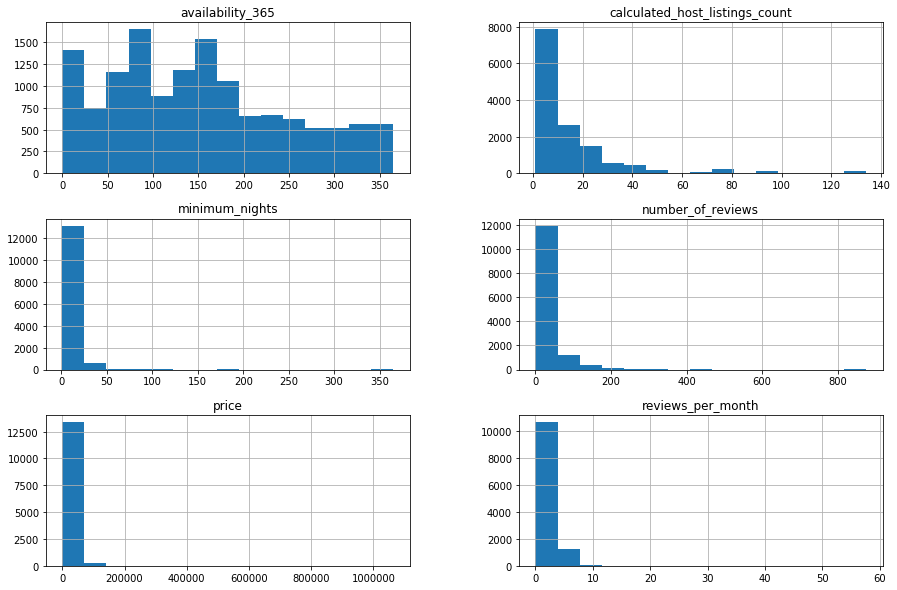

In [0]:
# plotar o histograma das variáveis numéricas
df[['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']].hist(bins=15, figsize=(15,10));

* O gráfico de `availability_365` mostra que boa parte dos imóveis fica mais disponível durante metade do ano.

* A contagem de hospedeiros indica que poucos têm muitos imóveis disponíveis e muitos têm poucos imóveis disponíveis.

* O número mínimo de noites para locação - `minimum_nights` - indica que há imóveis que requerem locação por um ano inteiro. Mas para a maioria dos imóveis o tempo mínimo está entre 1 e 30 dias.

* A distribuição dos preços de hospedagem - `price` -  sugere que haja alguns poucos imóveis com preço muito elevado. Isso indica a possível presença de *outliers* (valores que não seguem uma distribuição e distorcem a representação gráfica).

* Quanto às variáveis `number_of_reviews` e `reviews_per_month`, elas se mostram bem semelhantes, com  o gráfico sugerindo a presença de *outliers*.

### **Os *outliers***

Vamos confirmar agora a presença dos *outliers* indicados nos histogramas das variáveis `price` e `minimum_nights`. Há duas maneiras rápidas de se fazer isso:

* Pelo resumo estatístico, usando o método `describe()`
* Plotando `boxplots` para a variável avaliada.

In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,1.376200e+04,13762.000000,13762.000000,11926.000000,13762.000000
mean,1.920468e+04,3.181878,27.128542,2.095455,14.319140
std,5.458516e+04,10.127125,40.091788,1.615005,19.607411
min,0.000000e+00,1.000000,0.000000,0.030000,1.000000
25%,6.788000e+03,1.000000,2.000000,1.000000,3.000000
50%,1.094800e+04,1.000000,12.000000,1.940000,8.000000
75%,1.981500e+04,2.000000,35.000000,2.950000,17.000000
max,1.063900e+06,365.000000,876.000000,57.630000,134.000000


Com o resumo estatístico acima confirmamos algumas hipóteses:

* A variável `price` apresenta um valor médio de ¥19.204 e 75% dos valores estão na faixa de ¥19.800, porém seu valor máximo é ¥1.063.900 

* o número mínimo de noites é 1 e a média é de aproximadamente 3 dias de aluguel, o que é um número bem baixo (que deverá ser estendido até o período dos Jogos!). O número máximo de dias é 365.


#### Boxplot para price

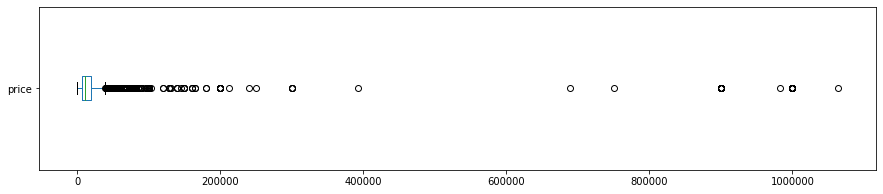


price: valores acima de 19800
3453 entradas
25.0908%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 19800 para price
print("\nprice: valores acima de 19800")
print("{} entradas".format(len(df[df.price > 19800])))
print("{:.4f}%".format((len(df[df.price > 19800]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,19800), figsize=(15,3));

#### Boxplot para minimum_nights

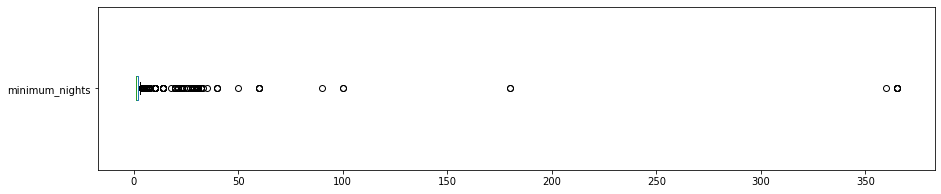

minimum_nights: valores acima de 30:
51 entradas
0.3706%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Tendo identificado os *outliers* nas variáveis `price` e `minimum_nights`, vamos limpar os dados e plotar novamente os histogramas.

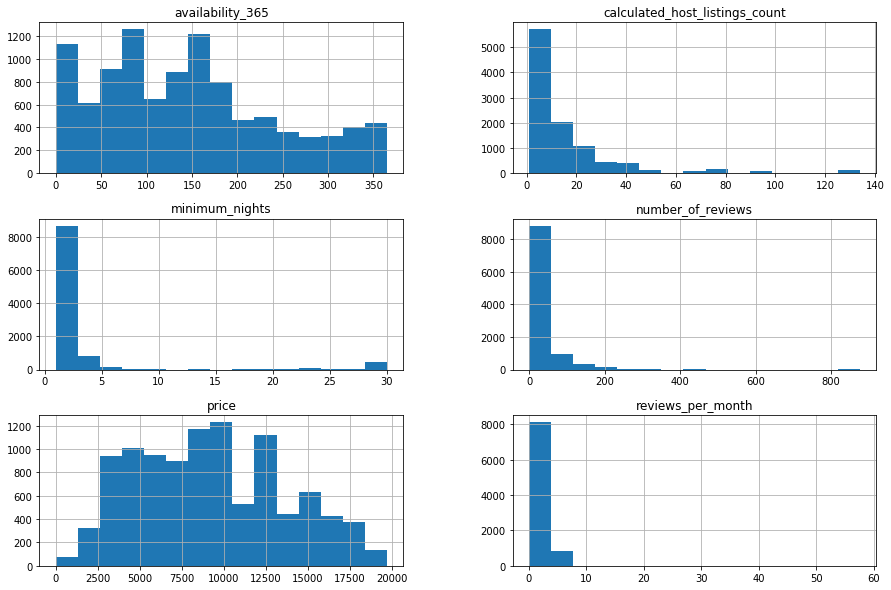

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 19800].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean[['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']].hist(bins=15, figsize=(15,10));

### **Correlação entre as variáveis**

É interesante analisar se existe uma relação, por exemplo, entre os preços de aluguel e o tempo de ocupação mínimo. 

Para identificar correlações entre essas variáveis de maior interesse, geramos um mapa de calor ou *heatmap*, com base numa matriz de correlação:

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,-0.106684,-0.016009,0.091537,-0.008596
minimum_nights,-0.106684,1.000000,-0.032669,-0.183673,0.013912
number_of_reviews,-0.016009,-0.032669,1.000000,0.567555,-0.054033
reviews_per_month,0.091537,-0.183673,0.567555,1.000000,-0.014089
availability_365,-0.008596,0.013912,-0.054033,-0.014089,1.000000


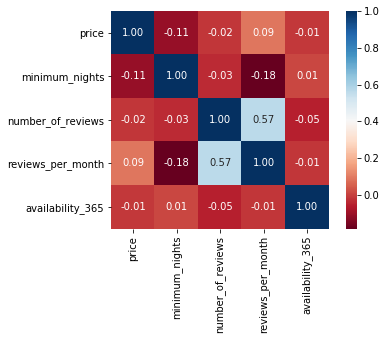

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Neste caso não verificamos uma correlação entre essas variáveis, a não ser entre `number_of_reviews` e `reviews_per_month`.

### **Tipo de imóvel mais alugado pelo Airbnb**

A coluna da variável `room_type` indica o tipo de locação, Existem opções de apartamentos ou casas inteiras, o aluguel de um quarto ou quarto compartilhado.

Contamos a quantidade de ocorrências de cada tipo de aluguel usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6329
Private room       2467
Hotel room          883
Shared room         582
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.616801
Private room       0.240425
Hotel room         0.086054
Shared room        0.056720
Name: room_type, dtype: float64

Portanto, dentre os imóveis para alugar são, aproximadamente:
* 61% casas ou apartamentos inteiros
* 24% quartos individuais
* 8% quartos de hotéis
* 5% quartos compartilhados


### **Localidades e valores**

Agora começamos a chegar ao ponto que nos interessa neste breve estudo, que é a disponibilidade de imóveis por bairro. 

Primeiro listaremos os preços médios de cada localidade:

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Shibuya Ku             11470.458589
Hachijo Machi          10979.142857
Minato Ku              10232.469697
Shinjuku Ku            10112.384000
Bunkyo Ku              10087.029703
Nakano Ku               9978.338509
Niijima Mura            9962.000000
Miyake Mura             9962.000000
Sumida Ku               9810.212555
Toshima Ku              9645.507529
Chiyoda Ku              9485.963504
Tachikawa Shi           9323.666667
Chuo Ku                 9176.590062
Taito Ku                9108.434719
Koto Ku                 9003.349727
Meguro Ku               8998.928571
Shinagawa Ku            8919.055556
Setagaya Ku             8897.675373
Fuchu Shi               8676.000000
Edogawa Ku              8542.835821
Katsushika Ku           8510.915493
Arakawa Ku              8455.634146
Musashino Shi           8346.000000
Kita Ku                 7996.413127
Oshima Machi            7960.666667
Mitaka Shi              7906.555556
Suginami Ku             7775.800676
Ota Ku        

Vemos que a localidade com aluguel médio mais alto é o distrito de Shibuya, o que é compatível com a realidade. Ele não é das regiões mais populosas mas, ao lado do distrito de Shinjuku, é um dos mais movimentados e por isso os preferidos por suas opções de lazer e cultura.

In [0]:
df_clean.neighbourhood.value_counts()

Shinjuku Ku            1625
Taito Ku               1371
Toshima Ku             1129
Sumida Ku               908
Shibuya Ku              652
Ota Ku                  490
Minato Ku               396
Nakano Ku               322
Chuo Ku                 322
Suginami Ku             296
Arakawa Ku              287
Katsushika Ku           284
Setagaya Ku             268
Kita Ku                 259
Itabashi Ku             250
Adachi Ku               204
Edogawa Ku              201
Koto Ku                 183
Shinagawa Ku            144
Chiyoda Ku              137
Bunkyo Ku               101
Nerima Ku                85
Meguro Ku                70
Hachioji Shi             33
Machida Shi              28
Oshima Machi             21
Musashino Shi            17
Nishitokyo Shi           17
Higashimurayama Shi      14
Akiruno Shi              13
Hino Shi                 13
Chofu Shi                13
Kokubunji Shi            11
Mitaka Shi                9
Kodaira Shi               9
Kunitachi Shi       

A maioria dos bairros ainda tem muito poucos imóveis disponíveis.

As regiões de interesse para a análise que pretendemos fazer oferecem pouco mais de uma centena de vagas, por exemplo Koto (183), que terá a maior parte dos eventos dos Jogos Olímpicos, e Chiyoda (137), que é região com muitas opções de transporte,

Taito, que é uma região mais barata, tem 1371 vagas.

Vale recordar que estes dados são de novembro de 2019.


Vamos conferir a densidade de imóveis oferecidos por região e valores respectivos, com as informações de latitude e longitude:

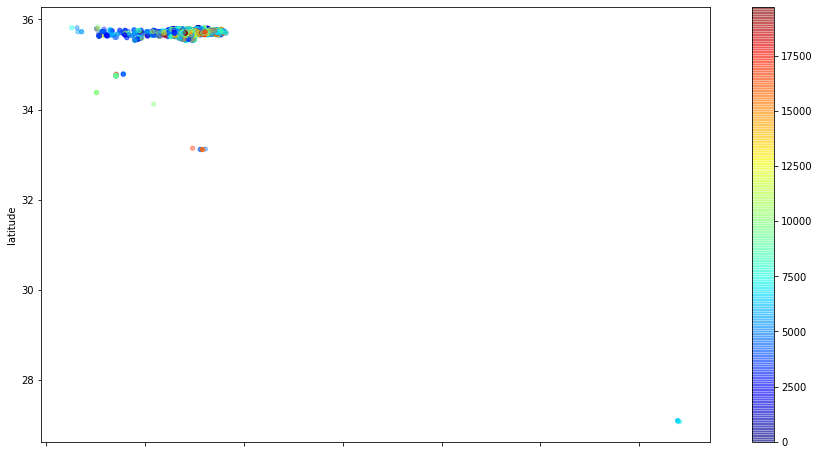

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=18,
              cmap=plt.get_cmap('jet'), figsize=(15,8));

Os imóveis parecem estar  concentrados na latitude 35. Vamos limpar os dados de outras latitudes para conseguir visualizar melhor as informações relacionadas aos preços por região:

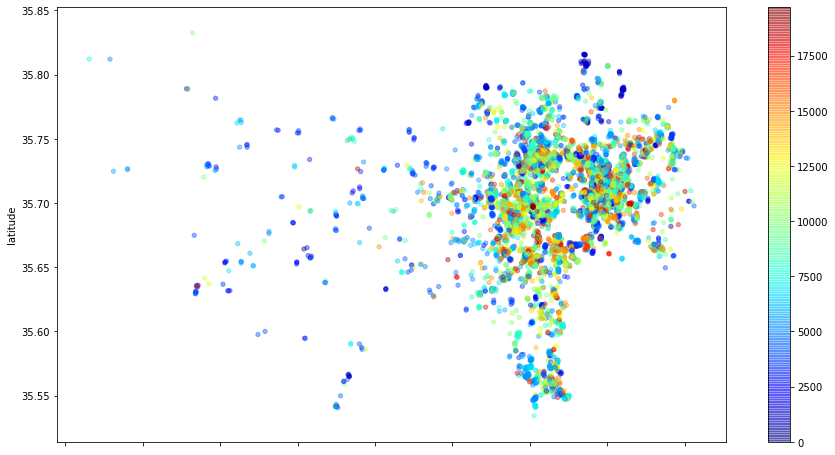

In [0]:
df_clean.drop(df_clean[df_clean.latitude <=35 ].index, axis=0, inplace=True)
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=18,
              cmap=plt.get_cmap('jet'), figsize=(15,8));


De fato, os valores mais altos estão concentrados nos bairros mais centrais. Mesmo assim se verificam pontos de valores mais baixos de maneira bem espalhada nessas mesmas regiões.

## Conclusões

Neste exercício foi feita uma análise superficial na base de dados do Airbnb e se procurou filtrar as informações de maior interesse, considerando a região mais próxima das localidades de eventos das Olimpíadas 2020.

Foi observado que 61% das locações oferecidas é referente a casas e apartamentos inteiros e os valores estão na faixa média de ¥19.704 (aproximadamente R$760, no câmbio de fevereiro de 2020)

Há baixa disponibilidade de vagas no dataset estudado (de novembro de 2019) se considerarmos as necessidades desse acontecimento esportivo. Um acompanhamento desse número de vagas - e valores - até os Jogos pode ser interessante para oferecer uma orientação aos turistas.

Com a evolução nos estudos de análise de dados será possível incrementar os detalhes e comparações de informações, em particular por regiões.
